# Assignment 1

First we need to import a few modules, execute the cell below:

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [13]:
import numpy as np
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    z=np.cos(x)
    return(z);

You can use the following cell to check that your code works for scalar arguments:

In [20]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [21]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [25]:
import numpy as np
def df_analytic(x):
    '''
    The analytic derivative
    '''
    z = np.sin(x)*-1
    return(z);

In [26]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [27]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [28]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    z = (f(x)-f(x-dx))/(dx)
    return(z);

In [29]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


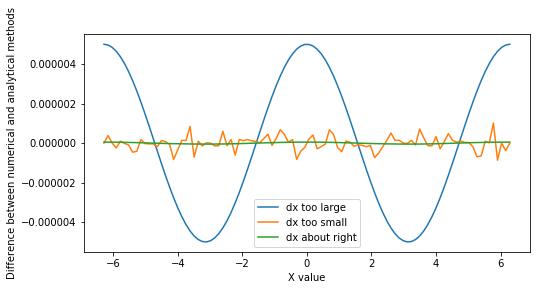

In [42]:
import numpy as np
import matplotlib.pyplot as plt
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-5)
df_dx_2 = backward_difference(f, xs, dx=1e-7)
df_dx_3 = backward_difference(f, xs, dx=1e-10)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.xlabel("X value")
plt.ylabel("Difference between numerical and analytical methods")
plt.plot(xs, df_dx_1 - df_dx_analytical, label='dx too large')
plt.plot(xs, df_dx_3 - df_dx_analytical, label='dx too small')
plt.plot(xs, df_dx_2- df_dx_analytical, label='dx about right')
plt.legend()
plt.show()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small accuracy is lost due to the way the numbers are stored. The computer stores numbers to a finite precision. Through calculations the last decimal points can be lost to rounding but then are deterministically "filled in" when there are free spaces for precison by the computer thus the values appear to be randomly spread around the true values. When dx is too large the difference between the numerical method and true value for the derivative becomes large as the numerical method approximates the function as a straight line between f(x) and f(x+dx) and takes the slope of that line. Thus if you approximate too large a section of the function as just a straight line you lose accuracy